## Import the Library

In [43]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2
import random
from functools import reduce

## Add your crendentials

In [203]:
# Insert your Spotify username and the credentials that you obtained from spotify developer
cid = 'XXXXXXXXXXXXXXXXXXXX'
secret = 'XXXXXXXXXXXXXXXXX'
redirect_uri='http://localhost:8910/callback'
username = 'XXXXXXXXXXXXXXX'

In [204]:
# Once the Authorisation is complete, we just need to `sp` to call the APIs
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

## Fetch the user's favourite songs
Now the API authnetication is complete, let's test it by getting users favourite songs

In [149]:
results = sp.current_user_top_tracks(limit=50, offset=0,time_range='medium_term')
results

{'items': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
      'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
      'id': '2YZyLoL8N0Wb9xBt1NhZWg',
      'name': 'Kendrick Lamar',
      'type': 'artist',
      'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL',
     'NO',

In [8]:
# Convert it to Dataframe
track_name = []
track_id = []
artist = []
album = []
duration = []
popularity = []
for i, items in enumerate(results['items']):
        track_name.append(items['name'])
        track_id.append(items['id'])
        artist.append(items["artists"][0]["name"])
        duration.append(items["duration_ms"])
        album.append(items["album"]["name"])
        popularity.append(items["popularity"])

# Create the final df   
df_favourite = pd.DataFrame({ "track_name": track_name, 
                             "album": album, 
                             "track_id": track_id,
                             "artist": artist, 
                             "duration": duration, 
                             "popularity": popularity})

df_favourite

,track_name,album,track_id,artist,duration,popularity
0,Alright,To Pimp A Butterfly,3iVcZ5G6tvkXZkZKlMpIUs,Kendrick Lamar,219333,72
1,Viol,Conspiracy Pt.2,07aqlD34P6qYrWjRNBt1eW,Gesaffelstein,343878,51
2,Blinding Lights,Blinding Lights,0sf12qNH5qcw8qpgymFOqD,The Weeknd,201573,82
3,Come On Eileen,Come On Eileen / Dubious,6nWcEzyxDozQcmxMoNJtYx,Dexys Midnight Runners,205933,69
4,"Thunderclouds (feat. Sia, Diplo, and Labrinth)","LABRINTH, SIA & DIPLO PRESENT... LSD",4lJNen4SMTIJMahALc3DcB,Sia,187026,77
5,Empire State Of Mind,The Blueprint 3,2igwFfvr1OAGX9SKDCPBwO,JAY-Z,276920,78
6,"Genius (feat. Sia, Diplo, and Labrinth)","LABRINTH, SIA & DIPLO PRESENT... LSD",4xigPf2sigSPmuFH3qCelB,Sia,213706,75
7,Paparazzi,The Fame,02XnQdf7sipaKBBHixz3Zp,Lady Gaga,208306,71
8,"The Four Seasons, Violin Concerto No. 4 in F M...",Sinkovsky Plays and Sings Vivaldi,7njAZhca4o80qQdCgyEWya,Antonio Vivaldi,117906,48
9,Close To Me,The Head On The Door (Remastered),4xiyq1iRdsxuU1BPUJ490Z,The Cure,203266,68


In [9]:
def fetch_audio_features(sp, df):
    playlist = df[['track_id','track_name']] 
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness'],
                              features['mode']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness','duration_ms', 'key',
                                                             'valence', 'speechiness', 'mode'])
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [10]:
df_fav = fetch_audio_features (sp, df_favourite)
df_fav

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
track_name,,,,,,,,,,,,,
Alright,3iVcZ5G6tvkXZkZKlMpIUs,0.796,0.074200,0.76600,110.034,0.000000,-5.974,0.0827,219333,7,0.5580,0.2380,1
Viol,07aqlD34P6qYrWjRNBt1eW,0.597,0.000076,0.83900,108.993,0.825000,-6.964,0.5500,343878,7,0.2020,0.0377,1
Blinding Lights,0sf12qNH5qcw8qpgymFOqD,0.513,0.001470,0.79600,171.017,0.000209,-4.075,0.0938,201573,1,0.3450,0.0629,1
Come On Eileen,6nWcEzyxDozQcmxMoNJtYx,0.410,0.197000,0.87400,107.080,0.000000,-4.286,0.0843,205933,0,0.8240,0.0907,1
"Thunderclouds (feat. Sia, Diplo, and Labrinth)",4lJNen4SMTIJMahALc3DcB,0.690,0.007700,0.71400,112.009,0.000072,-5.948,0.1910,187027,7,0.4890,0.0338,1
Empire State Of Mind,2igwFfvr1OAGX9SKDCPBwO,0.491,0.029500,0.95600,173.585,0.000000,-1.538,0.4600,276920,11,0.8110,0.3920,1
"Genius (feat. Sia, Diplo, and Labrinth)",4xigPf2sigSPmuFH3qCelB,0.603,0.079900,0.61500,158.657,0.000067,-4.931,0.1170,213707,11,0.5610,0.1650,0
Paparazzi,02XnQdf7sipaKBBHixz3Zp,0.762,0.113000,0.69200,114.906,0.000000,-3.973,0.0940,208307,5,0.3970,0.0438,0
"The Four Seasons, Violin Concerto No. 4 in F Minor, RV 297 ""Winter"": II. Largo",7njAZhca4o80qQdCgyEWya,0.330,0.898000,0.06490,83.398,0.000062,-25.176,0.0931,117907,3,0.3400,0.0443,1


In [11]:
df_fav.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alright to This Girl (Kungs Vs. Cookin' On 3 Burners)
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50 non-null     object 
 1   danceability      50 non-null     float64
 2   acousticness      50 non-null     float64
 3   energy            50 non-null     float64
 4   tempo             50 non-null     float64
 5   instrumentalness  50 non-null     float64
 6   loudness          50 non-null     float64
 7   liveness          50 non-null     float64
 8   duration_ms       50 non-null     int64  
 9   key               50 non-null     int64  
 10  valence           50 non-null     float64
 11  speechiness       50 non-null     float64
 12  mode              50 non-null     int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 5.5+ KB


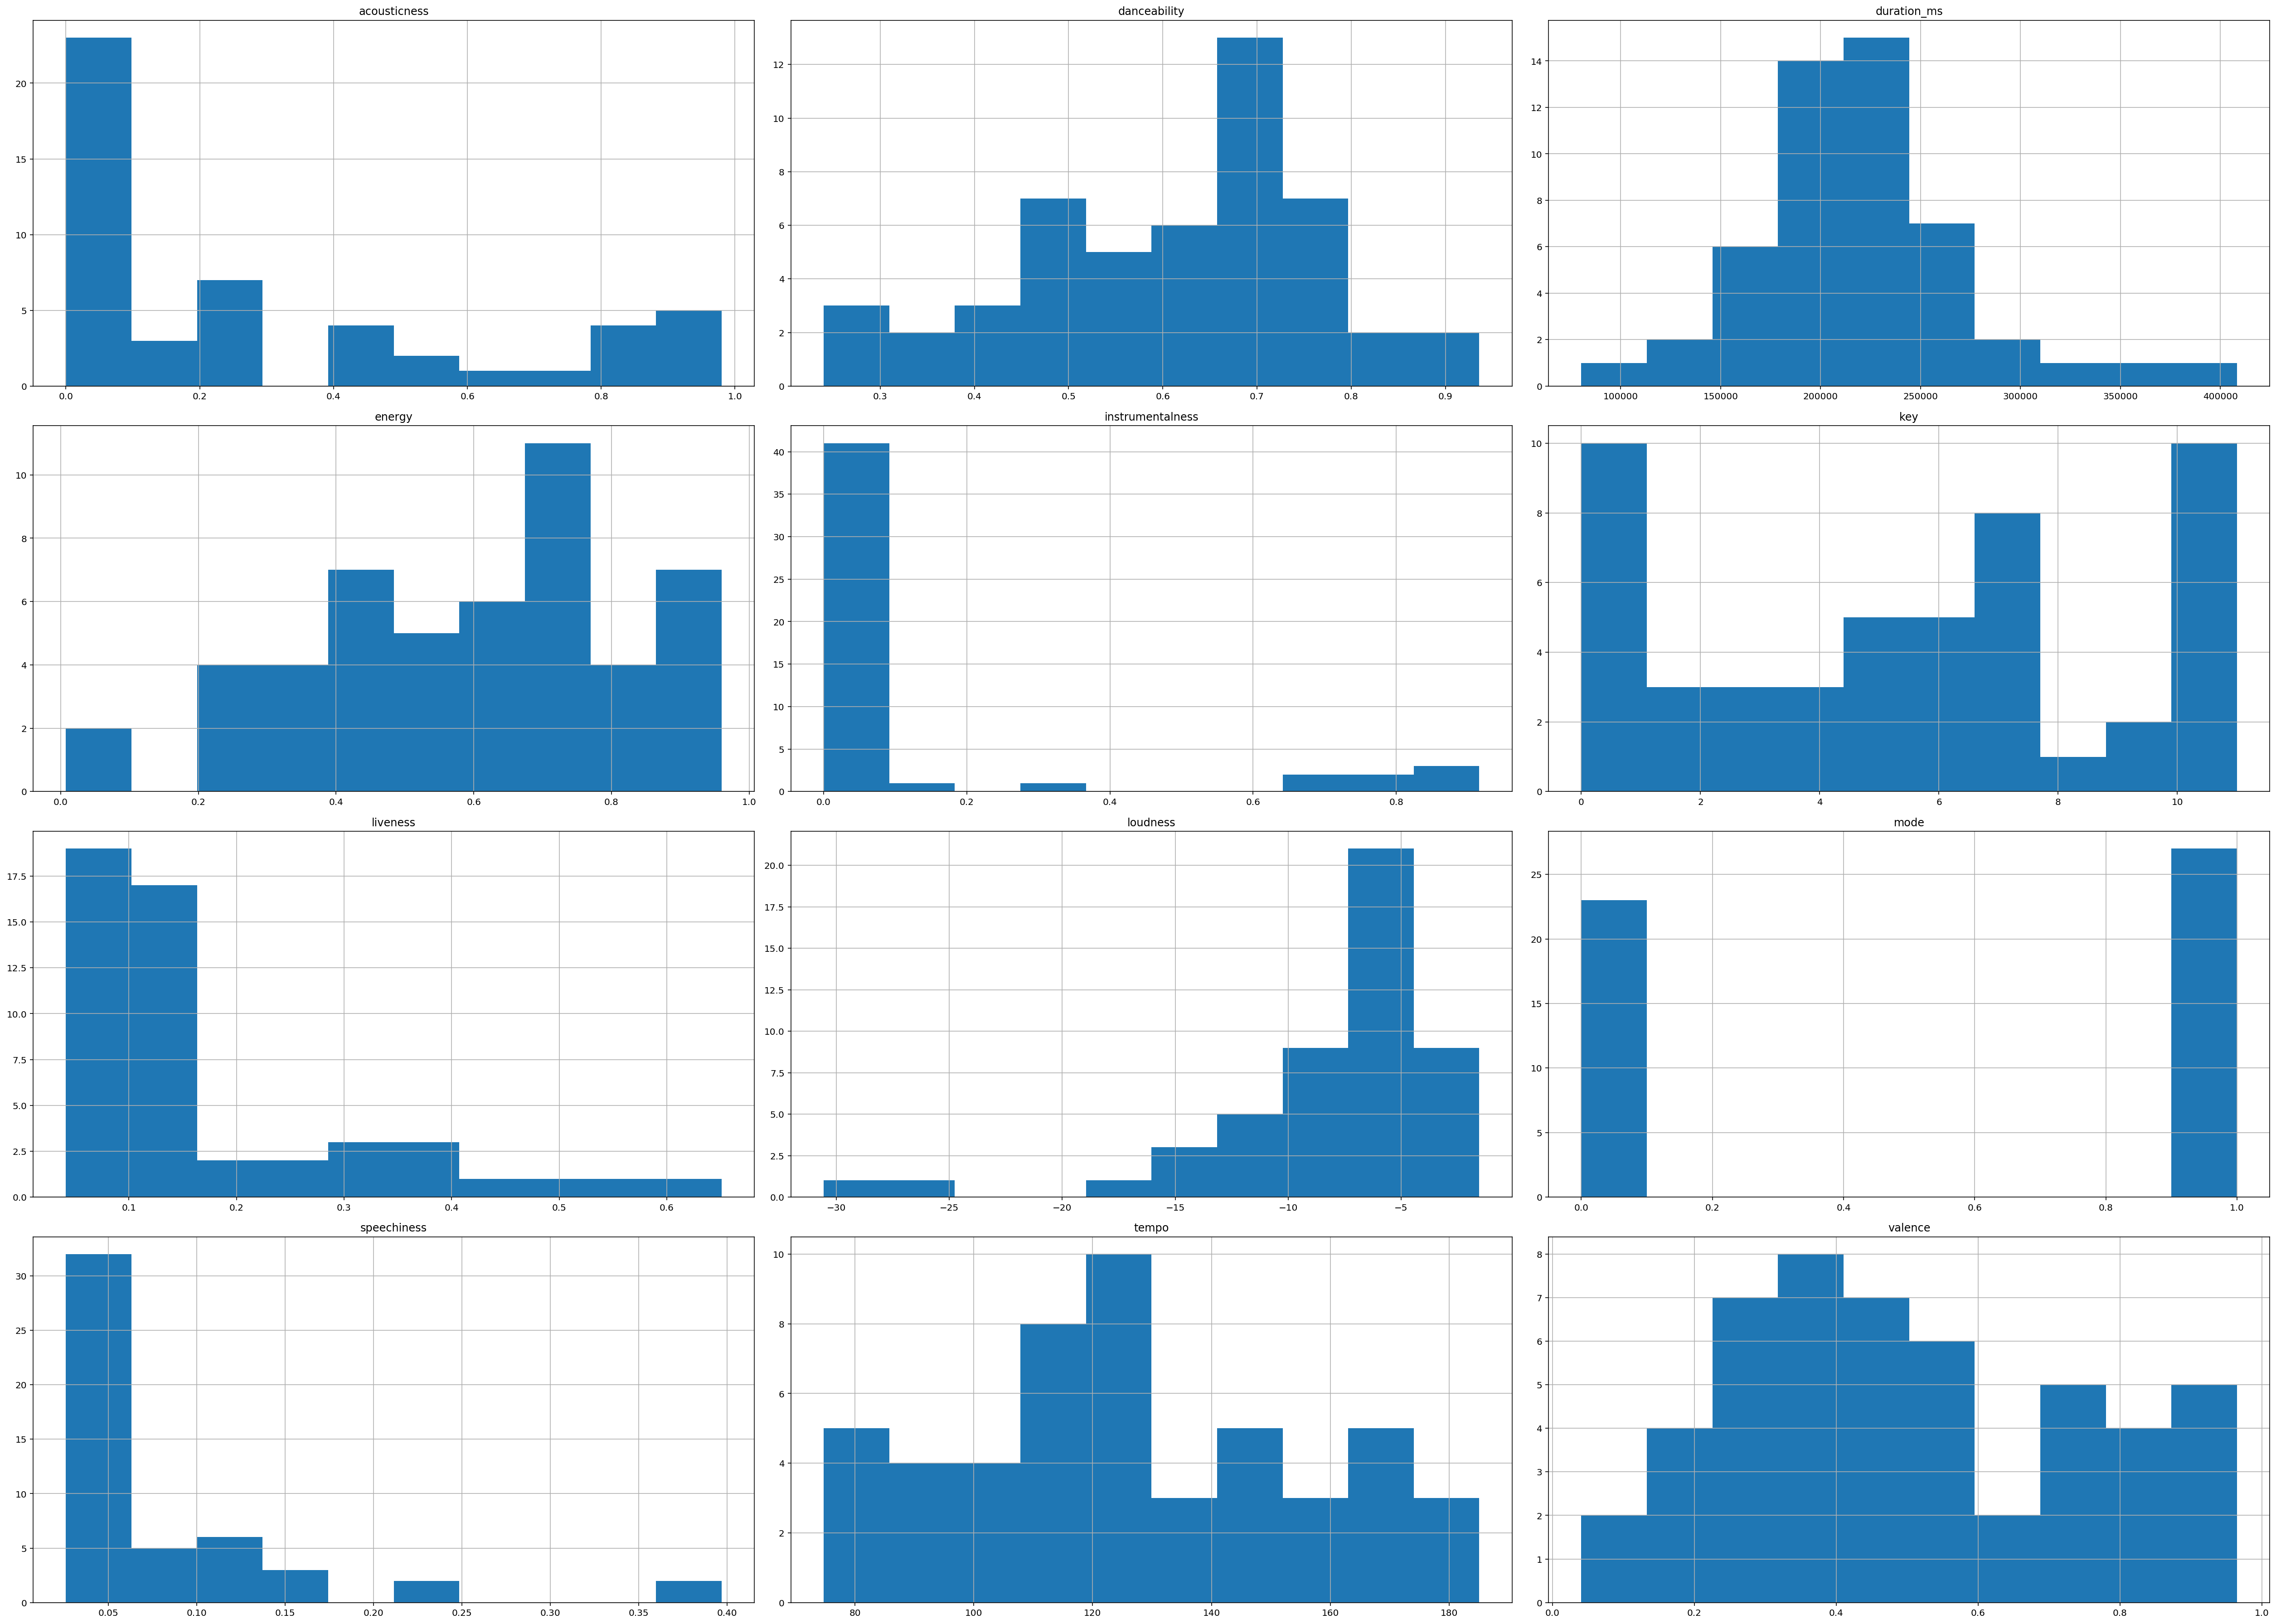

In [12]:
df_fav.hist(figsize=(35,25)) 
plt.tight_layout()
plt.show()

I would remove Mode it is binary number

## Fetch the Featured Playlist

In [16]:
response = sp.featured_playlists()
# check the format of the data 
response

{'message': "Editor's picks",
 'playlists': {'href': 'https://api.spotify.com/v1/browse/featured-playlists?timestamp=2020-05-30T06%3A29%3A42&offset=0&limit=20',
  'items': [{'collaborative': False,
    'description': "It's the day after, and the last thing you need is loud noises.",
    'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWUGsgkESc7qP'},
    'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWUGsgkESc7qP',
    'id': '37i9dQZF1DWUGsgkESc7qP',
    'images': [{'height': None,
      'url': 'https://i.scdn.co/image/ab67706f00000002693e220755d06b821e5dada9',
      'width': None}],
    'name': 'Hangover Friendly',
    'owner': {'display_name': 'Spotify',
     'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
     'href': 'https://api.spotify.com/v1/users/spotify',
     'id': 'spotify',
     'type': 'user',
     'uri': 'spotify:user:spotify'},
    'primary_color': None,
    'public': None,
    'snapshot_id': 'MTU5MDgyMDE0NiwwMDAwM

In [17]:
# Let's untangle the data
print(response['message'])
playlists = response['playlists']
# For looping through the API request
for i, item in enumerate(playlists['items']):
    print('no: {},Name: {},id: {}, description: {}, total tracks: {}'.
          format(playlists['offset'] + i, item['name'], item['id'],item['description'], item['tracks']['total']))
if playlists['next']:
    response = sp.next(playlists)
else:
    response = None

Editor's picks
no: 0,Name: Hangover Friendly,id: 37i9dQZF1DWUGsgkESc7qP, description: It's the day after, and the last thing you need is loud noises., total tracks: 50
no: 1,Name: Yoga & Meditation,id: 37i9dQZF1DX9uKNf5jGX6m, description: New age music for balancing mind and body., total tracks: 192
no: 2,Name: Guilty Pleasures,id: 37i9dQZF1DX4pUKG1kS0Ac, description: Embrace your secret favorites., total tracks: 151
no: 3,Name: Today's Top Hits,id: 37i9dQZF1DXcBWIGoYBM5M, description: Lady Gaga is on top of the Hottest 50!, total tracks: 50
no: 4,Name: Mellow Morning,id: 37i9dQZF1DWWzVPEmatsUB, description: Have a quiet morning with this mix of something familiar and something new., total tracks: 70
no: 5,Name: I Love My '90s Hip-Hop,id: 37i9dQZF1DX186v583rmzp, description: Real rap music from the golden era., total tracks: 100
no: 6,Name: Bliss,id: 37i9dQZF1DX4bSrsRWE9cd, description: That special feeling of being calm, happy and relaxed at the same time., total tracks: 75
no: 7,Name

Once the data strucutre is sorted, next step is to convert this API call into a data frame

In [18]:
def featured_playlists(sp):
    id = []
    name = []
    num_tracks = []
 # For looping through the API request  
    response = sp.featured_playlists()
    playlists = response['playlists']
    for i, items in enumerate(playlists['items']):
        id.append(items['id'])
        name.append(items['name'])
        num_tracks.append(items['tracks']['total'])

# Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [19]:
df_playlists = featured_playlists(sp)
df_playlists

,id,name,#tracks
0,37i9dQZF1DWUGsgkESc7qP,Hangover Friendly,50
1,37i9dQZF1DX9uKNf5jGX6m,Yoga & Meditation,192
2,37i9dQZF1DX4pUKG1kS0Ac,Guilty Pleasures,151
3,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,50
4,37i9dQZF1DWWzVPEmatsUB,Mellow Morning,70
5,37i9dQZF1DX186v583rmzp,I Love My '90s Hip-Hop,100
6,37i9dQZF1DX4bSrsRWE9cd,Bliss,75
7,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,234
8,37i9dQZF1DX1s9knjP51Oa,Calm Vibes,209
9,37i9dQZF1DX0Aaer4Jzfgm,Easy Classical,65


## Obtain the tracks from the playlists

In [20]:
def fetch_playlist_tracks(sp, playlistsid): 
    offset = 0
    tracks = []
    # Make the API request
    while True:
            content = sp.playlist_tracks( playlistsid, fields=None, limit=100, offset=offset, market=None)
            tracks += content['items']
        
            if content['next'] is not None:
                offset += 100
            else:
                break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
# Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [25]:
# Test the function
fetch_playlist_tracks(sp,'37i9dQZF1DXdd3gw5QVjt9')

,track_id,track_name
0,3r4KCd4tNnLHvDwZKGsl82,Our Remains - Acoustic
1,7rbVQAeKbC37aU45N5GOVC,Twist
2,5zpO1gVyTFv4MeNCEKOEZt,Body
3,4ZkZeQaJjmKuUPr7SOIjhU,When Creation Was Young
4,3Ed55g8hCz1GmqRTelIPIW,People Change
...,...,...
70,5tS60Dco9CkCtfRrHY7DGH,Something To Lose
71,566x9tfHqcnSM2LgxdIjR8,IOU
72,1A3bB2ovgd5LFV874leyZC,Heart and Mind Alike
73,1tLDBychkP96pHT664rJIY,I Knew I Could Fly


## Function to fetch the audio features from the songs of given playlist

In [136]:
def fetch_audio_features(sp, playlist_id):
    playlist = fetch_playlist_tracks(sp, playlist_id)
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness', 'duration_ms', 'key',
                                                             'valence', 'speechiness'])
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [205]:
# Build the dtaframe froms the playlists
for i, playlist in enumerate(df_playlists['id']):
    try:
        string_command = "df_{} = fetch_audio_features(sp, playlist)".format(playlist)
        print("Create {}".format(string_command))
        exec(string_command)
    except:
        print("playlist with id {} is not valid, skiping ".format(playlist))
        pass

Create df_37i9dQZF1DWUGsgkESc7qP = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX9uKNf5jGX6m = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4pUKG1kS0Ac = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DXcBWIGoYBM5M = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DWWzVPEmatsUB = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX186v583rmzp = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4bSrsRWE9cd = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DWTwnEm1IYyoj = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX1s9knjP51Oa = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX0Aaer4Jzfgm = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX2Nc3B70tvx0 = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DXdd3gw5QVjt9 = fetch_audio_features(sp, playlist)


In [ ]:
def fetch_audio_features_mean(sp, playlist_id):
    Playlist = df_playlist_audio_features(sp, playlist_id)
    return pd.DataFrame(playlist.mean(), columns= [playlist_id])

In [120]:
# Test the function
df = fetch_audio_features_mean(sp, '37i9dQZF1DX0MLFaUdXnjA')
df.head(10)

,37i9dQZF1DX0MLFaUdXnjA
danceability,0.581951
acousticness,0.474042
energy,0.462867
tempo,111.561311
instrumentalness,0.000945
loudness,-8.220748
liveness,0.151656
duration_ms,201064.718447
key,5.796117
valence,0.381193


In [ ]:
# Merge them together
dataframes = []
# Loop through the filenames to populate dataframes with different dataframes 
for  i in df_playlists['id']:
    dataframes.append(fetch_audio_features_mean(sp, i))

In [122]:
dataframes

[                  37i9dQZF1DWUGsgkESc7qP
 danceability                    0.531040
 acousticness                    0.615013
 energy                          0.373376
 tempo                         117.210820
 instrumentalness                0.031301
 loudness                      -10.223440
 liveness                        0.138172
 duration_ms                211046.280000
 key                             5.220000
 valence                         0.343238
 speechiness                     0.052214,
                   37i9dQZF1DX9uKNf5jGX6m
 danceability                    0.212175
 acousticness                    0.905896
 energy                          0.107958
 tempo                          94.115703
 instrumentalness                0.881552
 loudness                      -23.322240
 liveness                        0.116882
 duration_ms                194629.526042
 key                             4.442708
 valence                         0.067257
 speechiness                     

## Some Machine Learning 
### Find the best suited feature

In [123]:
X = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), dataframes)
X

,37i9dQZF1DWUGsgkESc7qP,37i9dQZF1DX9uKNf5jGX6m,37i9dQZF1DX4pUKG1kS0Ac,37i9dQZF1DXcBWIGoYBM5M,37i9dQZF1DWWzVPEmatsUB,37i9dQZF1DX186v583rmzp,37i9dQZF1DX4bSrsRWE9cd,37i9dQZF1DWTwnEm1IYyoj,37i9dQZF1DX1s9knjP51Oa,37i9dQZF1DX0Aaer4Jzfgm,37i9dQZF1DX2Nc3B70tvx0,37i9dQZF1DXdd3gw5QVjt9
danceability,0.531040,0.212175,0.654265,0.705860,0.554286,0.778800,0.491467,0.576821,0.431249,0.213734,0.619890,0.500493
acousticness,0.615013,0.905896,0.120505,0.242128,0.632800,0.104602,0.816649,0.343575,0.992196,0.922015,0.254227,0.700265
energy,0.373376,0.107958,0.782934,0.632260,0.374643,0.661640,0.231727,0.567451,0.040801,0.063926,0.603320,0.340019
tempo,117.210820,94.115703,120.574907,118.203140,124.450071,102.201830,117.217133,117.607115,101.224981,102.263015,119.753620,121.330013
instrumentalness,0.031301,0.881552,0.024762,0.008536,0.036294,0.006697,0.161682,0.004926,0.939909,0.774689,0.124936,0.067117
loudness,-10.223440,-23.322240,-6.169185,-6.279900,-9.440700,-8.234480,-14.827653,-6.978274,-26.042938,-25.944831,-7.941790,-11.602213
liveness,0.138172,0.116882,0.192781,0.229084,0.157356,0.220103,0.132816,0.140181,0.105214,0.112991,0.147402,0.136624
duration_ms,211046.280000,194629.526042,229940.807947,187232.660000,225649.785714,260780.560000,231640.213333,234562.995726,153573.928230,330475.261538,229763.980000,222820.720000
key,5.220000,4.442708,5.132450,5.740000,4.714286,6.060000,3.853333,5.414530,4.181818,5.046154,5.340000,5.026667
valence,0.343238,0.067257,0.686170,0.531180,0.331064,0.667970,0.248204,0.418665,0.283652,0.088962,0.518120,0.291721


In [185]:
Y = pd.DataFrame(df_fav.median(), columns= ['fav_playlist'])
Y= Y.drop('mode')
Y

,fav_playlist
danceability,0.645500
acousticness,0.116000
energy,0.661500
tempo,121.178500
instrumentalness,0.000058
loudness,-6.615500
liveness,0.109500
duration_ms,220379.000000
key,6.000000
valence,0.457500


In [128]:
# Analyze feature importances
from sklearn.ensemble.forest import RandomForestRegressor
# Can combine step above with this
forest = RandomForestRegressor(random_state=42, max_depth=5, max_features=10) 
forest.fit(X,Y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature rankings
print("Playlist ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X.columns[f], 
            importances[indices[f]]))

Playlist ranking:
1. 37i9dQZF1DWUGsgkESc7qP 0.119880 
2. 37i9dQZF1DX9uKNf5jGX6m 0.119570 
3. 37i9dQZF1DX4pUKG1kS0Ac 0.110297 
4. 37i9dQZF1DXcBWIGoYBM5M 0.099764 
5. 37i9dQZF1DWWzVPEmatsUB 0.096211 
6. 37i9dQZF1DX186v583rmzp 0.080158 
7. 37i9dQZF1DX4bSrsRWE9cd 0.077833 
8. 37i9dQZF1DWTwnEm1IYyoj 0.070390 
9. 37i9dQZF1DX1s9knjP51Oa 0.063965 
10. 37i9dQZF1DX0Aaer4Jzfgm 0.061934 
11. 37i9dQZF1DX2Nc3B70tvx0 0.059949 
12. 37i9dQZF1DXdd3gw5QVjt9 0.040049 


/Users/mgarg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


## Now we have ranking of top playlist, we can build playlist from top 2-3 of them

In [206]:
frames = [df_37i9dQZF1DWUGsgkESc7qP, df_37i9dQZF1DX9uKNf5jGX6m, df_37i9dQZF1DX4pUKG1kS0Ac]
df =pd.concat(frames)
df

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
track_name,,,,,,,,,,,,
Mystery of Love,5GbVzc6Ex5LYlLJqzRQhuy,0.365,0.9400,0.273,132.285,0.43100,-16.526,0.1090,248960,4,0.238,0.0380
Bruises,7x91w5f5x7UayENcGAP5i2,0.572,0.9630,0.319,110.922,0.00000,-6.206,0.1610,218492,4,0.359,0.0685
Let Me Down Slowly,2uaiyLKnYvazyfR0Ky3Kbk,0.649,0.7330,0.548,150.036,0.00000,-5.692,0.1360,169181,1,0.506,0.0318
Wait & See,1gMtAgRAmwzA4TVbynaN79,0.603,0.8940,0.328,98.229,0.00000,-8.155,0.1090,174268,4,0.387,0.0256
Budapest,7GJClzimvMSghjcrKxuf1M,0.714,0.0883,0.451,127.787,0.00000,-8.268,0.1080,200720,5,0.406,0.0276
...,...,...,...,...,...,...,...,...,...,...,...,...
All The Things She Said,6tBdTwcyyGq1HU3PXgZK82,0.604,0.0359,0.831,89.994,0.00854,-5.720,0.1050,214440,5,0.447,0.0387
Achy Breaky Heart,2EoIt9vdgFRNW03u5IvFsQ,0.800,0.0510,0.563,121.808,0.00000,-10.209,0.0797,203373,9,0.961,0.0303
Down,6ND2f7SUjYNpLqL0WPcNT1,0.654,0.0108,0.684,66.001,0.00000,-4.509,0.0768,212280,2,0.700,0.0320


In [208]:
df = df.set_index(['track_id'])
df

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
track_id,,,,,,,,,,,
5GbVzc6Ex5LYlLJqzRQhuy,0.365,0.9400,0.273,132.285,0.43100,-16.526,0.1090,248960,4,0.238,0.0380
7x91w5f5x7UayENcGAP5i2,0.572,0.9630,0.319,110.922,0.00000,-6.206,0.1610,218492,4,0.359,0.0685
2uaiyLKnYvazyfR0Ky3Kbk,0.649,0.7330,0.548,150.036,0.00000,-5.692,0.1360,169181,1,0.506,0.0318
1gMtAgRAmwzA4TVbynaN79,0.603,0.8940,0.328,98.229,0.00000,-8.155,0.1090,174268,4,0.387,0.0256
7GJClzimvMSghjcrKxuf1M,0.714,0.0883,0.451,127.787,0.00000,-8.268,0.1080,200720,5,0.406,0.0276
...,...,...,...,...,...,...,...,...,...,...,...
6tBdTwcyyGq1HU3PXgZK82,0.604,0.0359,0.831,89.994,0.00854,-5.720,0.1050,214440,5,0.447,0.0387
2EoIt9vdgFRNW03u5IvFsQ,0.800,0.0510,0.563,121.808,0.00000,-10.209,0.0797,203373,9,0.961,0.0303
6ND2f7SUjYNpLqL0WPcNT1,0.654,0.0108,0.684,66.001,0.00000,-4.509,0.0768,212280,2,0.700,0.0320


In [186]:
# CO
Y= Y.squeeze('columns')

loudness                -6.615500
instrumentalness         0.000058
speechiness              0.050100
liveness                 0.109500
acousticness             0.116000
valence                  0.457500
danceability             0.645500
energy                   0.661500
key                      6.000000
tempo                  121.178500
duration_ms         220379.000000
Name: fav_playlist, dtype: float64

In [188]:
Y = Y.sort_index( axis=0, level=None, ascending=True, inplace=False, kind='quicksort')
Y

acousticness             0.116000
danceability             0.645500
duration_ms         220379.000000
energy                   0.661500
instrumentalness         0.000058
key                      6.000000
liveness                 0.109500
loudness                -6.615500
speechiness              0.050100
tempo                  121.178500
valence                  0.457500
Name: fav_playlist, dtype: float64

In [209]:
# Subtract mean of the favourite plalyist from the top 3 playlist 
df1= df.subtract(Y, axis='columns') 
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
track_id,,,,,,,,,,,
5GbVzc6Ex5LYlLJqzRQhuy,0.8240,-0.2805,28581.0,-0.3885,0.430942,-2.0,-0.0005,-9.9105,-0.0121,11.1065,-0.2195
7x91w5f5x7UayENcGAP5i2,0.8470,-0.0735,-1887.0,-0.3425,-0.000058,-2.0,0.0515,0.4095,0.0184,-10.2565,-0.0985
2uaiyLKnYvazyfR0Ky3Kbk,0.6170,0.0035,-51198.0,-0.1135,-0.000058,-5.0,0.0265,0.9235,-0.0183,28.8575,0.0485
1gMtAgRAmwzA4TVbynaN79,0.7780,-0.0425,-46111.0,-0.3335,-0.000058,-2.0,-0.0005,-1.5395,-0.0245,-22.9495,-0.0705
7GJClzimvMSghjcrKxuf1M,-0.0277,0.0685,-19659.0,-0.2105,-0.000058,-1.0,-0.0015,-1.6525,-0.0225,6.6085,-0.0515
...,...,...,...,...,...,...,...,...,...,...,...
6tBdTwcyyGq1HU3PXgZK82,-0.0801,-0.0415,-5939.0,0.1695,0.008482,-1.0,-0.0045,0.8955,-0.0114,-31.1845,-0.0105
2EoIt9vdgFRNW03u5IvFsQ,-0.0650,0.1545,-17006.0,-0.0985,-0.000058,3.0,-0.0298,-3.5935,-0.0198,0.6295,0.5035
6ND2f7SUjYNpLqL0WPcNT1,-0.1052,0.0085,-8099.0,0.0225,-0.000058,-4.0,-0.0327,2.1065,-0.0181,-55.1775,0.2425


In [210]:
df1= df1.divide(Y, axis='columns') 
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
track_id,,,,,,,,,,,
5GbVzc6Ex5LYlLJqzRQhuy,7.103448,-0.434547,0.129690,-0.587302,7442.868739,-0.333333,-0.004566,1.498073,-0.241517,0.091654,-0.479781
7x91w5f5x7UayENcGAP5i2,7.301724,-0.113865,-0.008563,-0.517763,-1.000000,-0.333333,0.470320,-0.061900,0.367265,-0.084640,-0.215301
2uaiyLKnYvazyfR0Ky3Kbk,5.318966,0.005422,-0.232318,-0.171580,-1.000000,-0.833333,0.242009,-0.139596,-0.365269,0.238140,0.106011
1gMtAgRAmwzA4TVbynaN79,6.706897,-0.065840,-0.209235,-0.504157,-1.000000,-0.333333,-0.004566,0.232711,-0.489022,-0.189386,-0.154098
7GJClzimvMSghjcrKxuf1M,-0.238793,0.106119,-0.089205,-0.318216,-1.000000,-0.166667,-0.013699,0.249792,-0.449102,0.054535,-0.112568
...,...,...,...,...,...,...,...,...,...,...,...
6tBdTwcyyGq1HU3PXgZK82,-0.690517,-0.064291,-0.026949,0.256236,146.495682,-0.166667,-0.041096,-0.135364,-0.227545,-0.257344,-0.022951
2EoIt9vdgFRNW03u5IvFsQ,-0.560345,0.239349,-0.077167,-0.148904,-1.000000,0.500000,-0.272146,0.543194,-0.395210,0.005195,1.100546
6ND2f7SUjYNpLqL0WPcNT1,-0.906897,0.013168,-0.036750,0.034014,-1.000000,-0.666667,-0.298630,-0.318419,-0.361277,-0.455341,0.530055


In [215]:
# Add all the score 
df1['variation'] = df1.sum(axis=1)
# take the absoulte of the variatio
df1['variation'] = df1['variation'].abs()
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,variation
track_id,,,,,,,,,,,,
5GbVzc6Ex5LYlLJqzRQhuy,7.103448,-0.434547,0.129690,-0.587302,7442.868739,-0.333333,-0.004566,1.498073,-0.241517,0.091654,-0.479781,14899.221116
7x91w5f5x7UayENcGAP5i2,7.301724,-0.113865,-0.008563,-0.517763,-1.000000,-0.333333,0.470320,-0.061900,0.367265,-0.084640,-0.215301,11.607891
2uaiyLKnYvazyfR0Ky3Kbk,5.318966,0.005422,-0.232318,-0.171580,-1.000000,-0.833333,0.242009,-0.139596,-0.365269,0.238140,0.106011,6.336903
1gMtAgRAmwzA4TVbynaN79,6.706897,-0.065840,-0.209235,-0.504157,-1.000000,-0.333333,-0.004566,0.232711,-0.489022,-0.189386,-0.154098,7.979938
7GJClzimvMSghjcrKxuf1M,-0.238793,0.106119,-0.089205,-0.318216,-1.000000,-0.166667,-0.013699,0.249792,-0.449102,0.054535,-0.112568,3.955607
...,...,...,...,...,...,...,...,...,...,...,...,...
6tBdTwcyyGq1HU3PXgZK82,-0.690517,-0.064291,-0.026949,0.256236,146.495682,-0.166667,-0.041096,-0.135364,-0.227545,-0.257344,-0.022951,290.238390
2EoIt9vdgFRNW03u5IvFsQ,-0.560345,0.239349,-0.077167,-0.148904,-1.000000,0.500000,-0.272146,0.543194,-0.395210,0.005195,1.100546,0.130974
6ND2f7SUjYNpLqL0WPcNT1,-0.906897,0.013168,-0.036750,0.034014,-1.000000,-0.666667,-0.298630,-0.318419,-0.361277,-0.455341,0.530055,6.933489


In [216]:
# Now we have the variation, we will take the songs with the least variation 
df2 = df1.nsmallest(50,'variation')
df2

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,variation
track_id,,,,,,,,,,,,
4cJ30q7CGBcPIZFt7qTt7L,1.103448,0.022463,-0.233942,0.120181,-1.000000,-1.000000,1.091324,0.146399,-0.067864,-0.158489,-0.049180,0.051321
5esPpmrM2AsyDVgOKzWQwU,0.974138,-0.101472,0.091756,0.038549,-1.000000,0.000000,-0.004566,-0.183735,1.115768,-0.372711,-0.591257,0.067059
4YOJFyjqh8eAcbKFfv88mV,-0.760345,0.161890,0.300791,0.186697,-1.000000,0.000000,-0.451142,0.651576,0.179641,0.042767,0.643716,0.088817
2EoIt9vdgFRNW03u5IvFsQ,-0.560345,0.239349,-0.077167,-0.148904,-1.000000,0.500000,-0.272146,0.543194,-0.395210,0.005195,1.100546,0.130974
6n9yCXvLhnYMgJIiIcMu7D,-0.604310,-0.045701,0.143666,0.375661,-1.000000,-1.000000,2.132420,-0.545915,-0.229541,0.188932,0.514754,0.140067
1TfqLAPs4K3s2rJMoCokcS,0.956897,0.072037,-0.015637,0.074830,-1.000000,-1.000000,0.095890,0.133399,-0.367265,0.032650,0.912568,0.209262
4O4Z8VFczL8MxIOmqVWc1b,-0.293966,-0.154144,0.001488,0.352986,-0.754750,0.500000,-0.298630,0.086690,0.155689,0.436633,0.079781,0.223556
6epn3r7S14KUqlReYr77hA,-0.654310,0.127808,-0.027857,0.300076,-1.000000,-0.166667,0.013699,-0.208374,1.734531,-0.463246,0.169399,0.349884
5nPdMALTEd7HOjn16oNf2X,0.284483,0.129357,0.249847,0.275888,-0.950432,-0.166667,-0.448402,0.333837,-0.313373,0.084838,0.698361,0.355474


## Create the Playlist

In [217]:
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [218]:
create_playlist(sp, username, 'DJ Python', 'Test playlist created using python!')

In [220]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [222]:
fetch_playlists(sp,username)

,id,name,#tracks
0,2JKyl30f27MCwJ3oeH0elT,DJ Python,0
1,4MN1OXdcusQ3wEiwmOyrhe,Manik Pandas,220
2,32UnRFwEKfxwXsXRohojag,Manik test,94
3,78nd7KPLRsTkPJ6Xng3DxP,60s,1
4,2BkRcapmpwixCXSioInwgq,Beats,4
5,4VYBKW9lv0TOoV2emQuxU4,classical,8
6,4lLqkdcRjP3tKV3cgmgO74,Off Pop,4
7,4597gwvthra2um7pP4hT0g,ROCK,2
8,1qIU9gePnwblFmrwd5JKcP,gangsta life,7
9,6QUZy0spzIyy0XzJ2Kqd2N,Decent,3


In [223]:
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 50])
        index += 50

In [224]:
list_track = df2.index

In [225]:
enrich_playlist(sp, username, '2JKyl30f27MCwJ3oeH0elT', list_track)

In [226]:
fetch_playlists(sp,username)

,id,name,#tracks
0,2JKyl30f27MCwJ3oeH0elT,DJ Python,50
1,78nd7KPLRsTkPJ6Xng3DxP,60s,1
2,2BkRcapmpwixCXSioInwgq,Beats,4
3,4VYBKW9lv0TOoV2emQuxU4,classical,8
4,4lLqkdcRjP3tKV3cgmgO74,Off Pop,4
5,4597gwvthra2um7pP4hT0g,ROCK,2
6,1qIU9gePnwblFmrwd5JKcP,gangsta life,7
7,6QUZy0spzIyy0XzJ2Kqd2N,Decent,3
8,5W1PCUNFazfAbD7WfgXa32,Kuchki,20
9,6jKHS2i6kw7KfqdRPPeQAc,I'm Yours,5
